In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data=pd.read_csv('churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

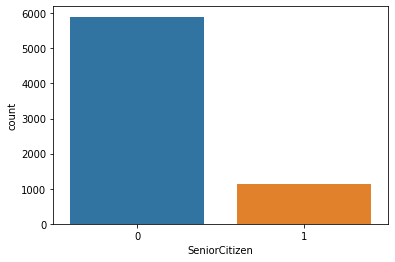

In [9]:
sns.countplot(data['SeniorCitizen']);

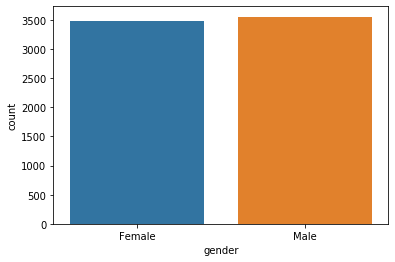

In [11]:
sns.countplot(data['gender']);

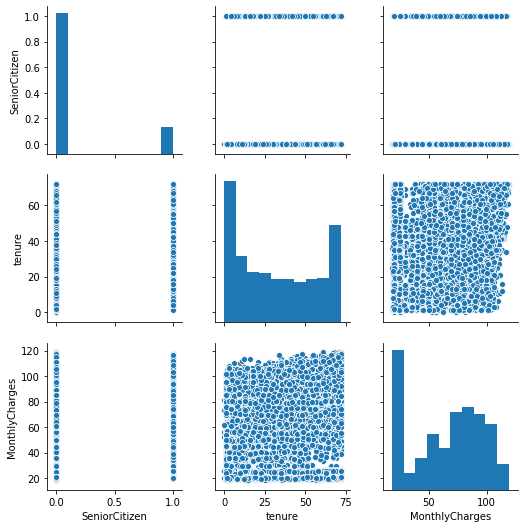

In [12]:
sns.pairplot(data);

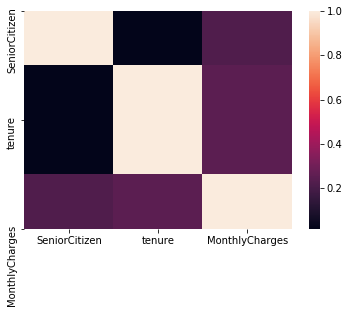

In [7]:
sns.heatmap(data.corr())

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
for col in data.columns:
    data[col]=le.fit_transform(data[col])

In [9]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [10]:
data.drop('customerID',axis=1,inplace=True)

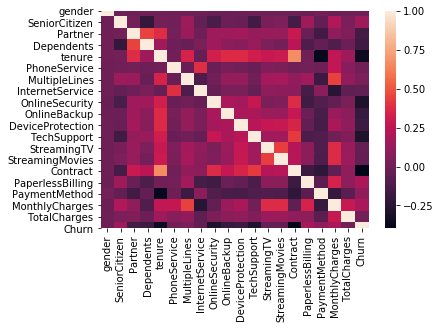

In [11]:
sns.heatmap(data.corr())

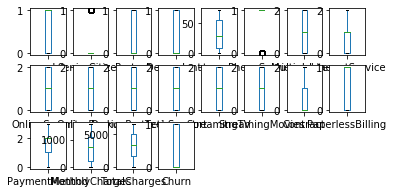

In [12]:
data.plot(kind='box',subplots=True,layout=(4,8));

In [13]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(7043, 20)
(6361, 20)


In [14]:

data=data_final

In [15]:
data.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.166854
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

In [16]:
data['MonthlyCharges']=np.power(data['MonthlyCharges'],2)

In [17]:
df_x=data.drop('Churn',axis=1)
y=data['Churn']
df_x.shape,y.shape

((6361, 19), (6361,))

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=MinMaxScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,0.0,0.472222,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.098844,0.224502
1,1.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.075764,0.024043
2,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.211809,0.141654
3,0.0,0.0,0.0,0.0,0.111111,0.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.646887,0.934763
4,1.0,0.0,0.0,1.0,0.305556,0.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.333333,0.460582,0.237366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,0.000000,0.001078,0.117917
6357,1.0,0.0,1.0,1.0,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.391415,0.244564
6358,0.0,0.0,1.0,1.0,1.000000,0.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.715648,0.872588
6359,1.0,1.0,1.0,0.0,0.055556,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.251898,0.407351


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [20]:
lr=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
ad=AdaBoostClassifier()

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_train,y_train)

0.8054245283018868

In [22]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.8091123330714847


cross_val is  0.8072614905875725


F1_score is 0.5759162303664922


roc_auc_score 0.7106811145510835


classification report               precision    recall  f1-score   support

           0       0.85      0.91      0.88       950
           1       0.66      0.51      0.58       323

    accuracy                           0.81      1273
   macro avg       0.75      0.71      0.73      1273
weighted avg       0.80      0.81      0.80      1273



confusion matrix
 [[865  85]
 [158 165]]





********************** SVC ************************
SVC(C=1.0, cache_siz

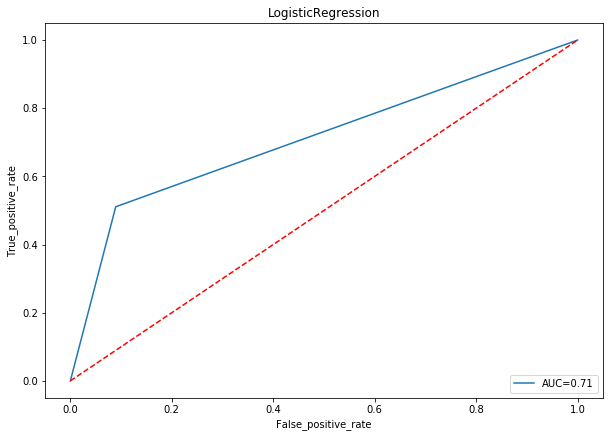

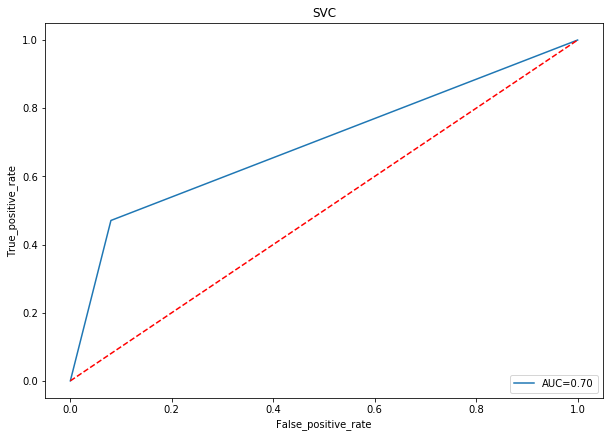

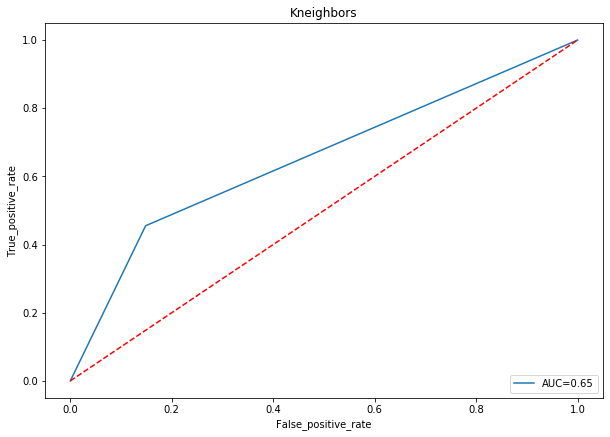

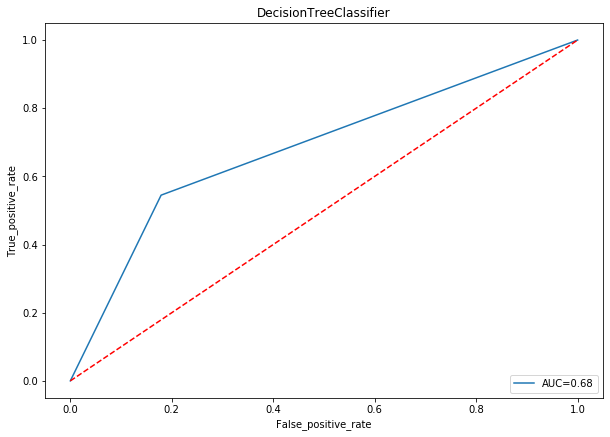

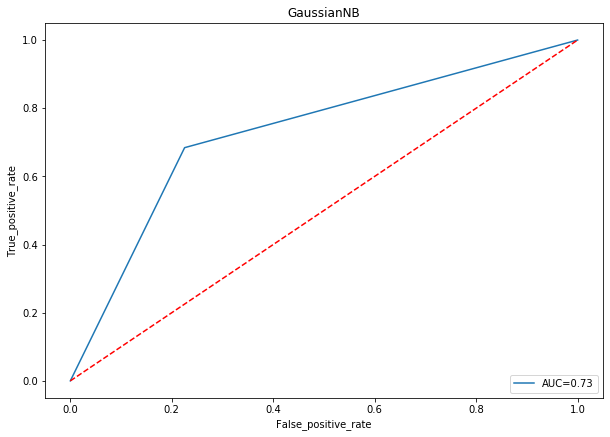

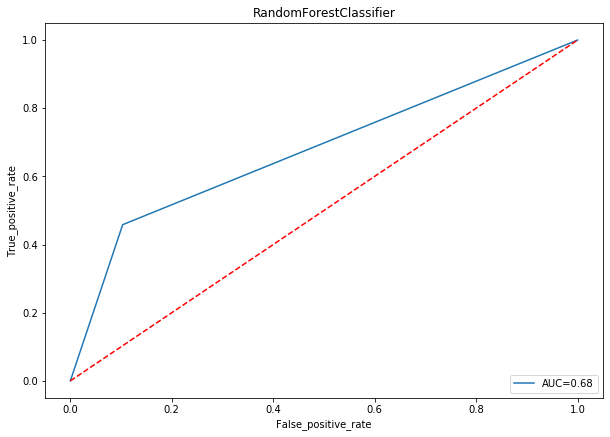

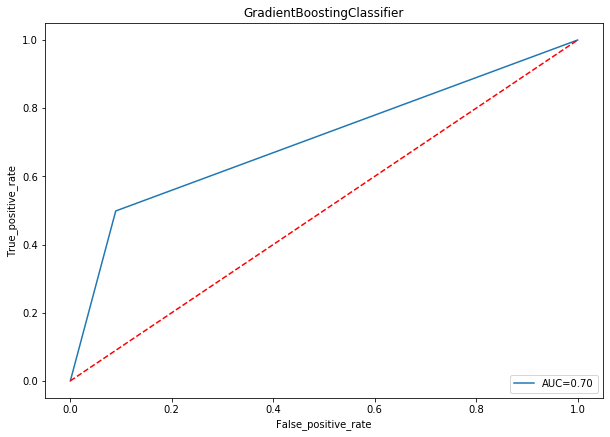

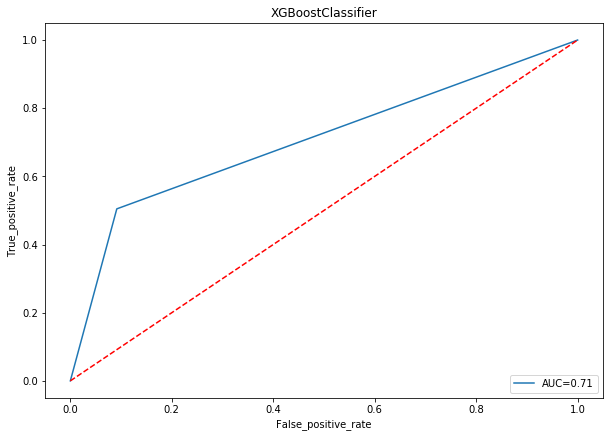

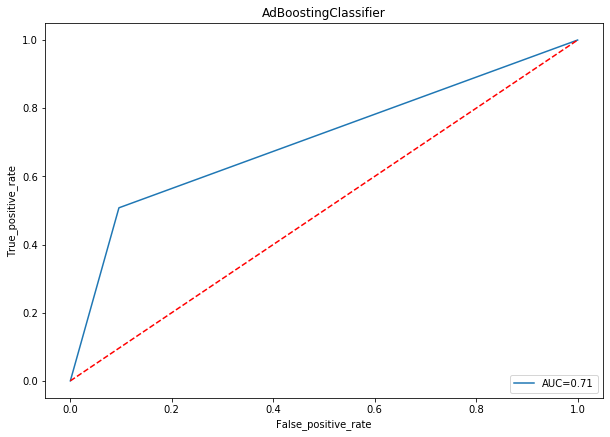

In [23]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    print('\n\n')

In [24]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,80.911233,80.726149,57.591623,71.068111
1,SVC,80.597015,80.003274,55.172414,69.529412
2,Kneighbors,75.098193,75.318329,48.117840,65.334365
3,DecisionTreeClassifier,75.098193,73.824864,52.615845,68.297214
4,GaussianNB,75.176748,75.947211,58.311346,72.947368
5,RandomForestClassifier,78.554595,78.588055,52.021090,67.752322
6,GradientBoostingClassifier,80.597015,80.679301,56.590510,70.448916
7,XGBoostClassifier,80.597015,80.569188,56.893543,70.653251
8,AdBoostingClassifier,80.361351,80.270298,56.747405,70.597523


In [25]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
gd=GridSearchCV(rf,param_grid=[{'n_estimators':[50,100,150,200],
                                'criterion':['gini','entropy'],
                                 
                                 'max_depth':[i for i in range(1,11)]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.8036556603773585
{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 150}


In [26]:
gb=GradientBoostingClassifier()
gd=GridSearchCV(gb,param_grid=[{'n_estimators':[50,100,150,200],
                                 'max_depth':[2,3,4,5,6,7,8]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.804441823899371
{'max_depth': 4, 'n_estimators': 50}


In [27]:
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
gd=GridSearchCV(xgb,param_grid=[{'n_estimators':[100,150,200],
                                 'max_depth':[2,3,4,5,6,7,8],
                                  }],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


0.8024764150943396
{'max_depth': 3, 'n_estimators': 100}


In [28]:

knn=KNeighborsClassifier()
knngd=GridSearchCV(knn,param_grid=[{'n_neighbors':[i for i in range(1,33,2)],
                                 'weights':['uniform','distance']}],cv=5)
knngd.fit(x_train,y_train)
print(knngd.best_score_)
print(knngd.best_params_)
                             

0.7712264150943396
{'n_neighbors': 19, 'weights': 'uniform'}


In [29]:
sv=SVC(gamma='auto')
svgd=GridSearchCV(sv,param_grid=[{'kernel':['rbf','poly','linear','sigmoid']}],cv=5)
svgd.fit(x_train,y_train)
print(svgd.best_score_)
print(svgd.best_params_)
                             

0.7999213836477987
{'kernel': 'linear'}


In [30]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[lr],
                                
                                'n_estimators':[50,100,150,200]}],cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

                            

0.7997248427672956
{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), 'n_estimators': 200}


In [31]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[gb],
                                
                                'n_estimators':[50,100,150,200]}],cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

                            

0.7617924528301887
{'base_estimator': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), 'n_estimators': 50}


In [32]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
gd=GridSearchCV(ad,param_grid=[{'base_estimator':[rf],
                                
                                'n_estimators':[50,100,150,200]}],cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

                            

0.7757468553459119
{'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'n_estimators': 200}


In [36]:
lr=LogisticRegression()
svc=SVC(kernel='linear')
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=19)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=150,max_depth=8)
gb=GradientBoostingClassifier(n_estimators=50,max_depth=4)
xgb=XGBClassifier(n_estimators=100,max_depth=3)
ad=AdaBoostClassifier()

In [37]:
model_list=[]
model_list.append(('LogisticRegression',lr))
model_list.append(('SVC',svc))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeClassifier',dt))
model_list.append(('GaussianNB',nb))
model_list.append(('RandomForestClassifier',rf))
model_list.append(('GradientBoostingClassifier',gb))
model_list.append(('XGBoostClassifier',xgb))
model_list.append(('AdBoostingClassifier',ad))

********************** LogisticRegression ************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is  0.8091123330714847


cross_val is  0.8072614905875725


F1_score is 0.5759162303664922


roc_auc_score 0.7106811145510835


classification report               precision    recall  f1-score   support

           0       0.85      0.91      0.88       950
           1       0.66      0.51      0.58       323

    accuracy                           0.81      1273
   macro avg       0.75      0.71      0.73      1273
weighted avg       0.80      0.81      0.80      1273



confusion matrix
 [[865  85]
 [158 165]]





********************** SVC ************************
SVC(C=1.0, cache_siz

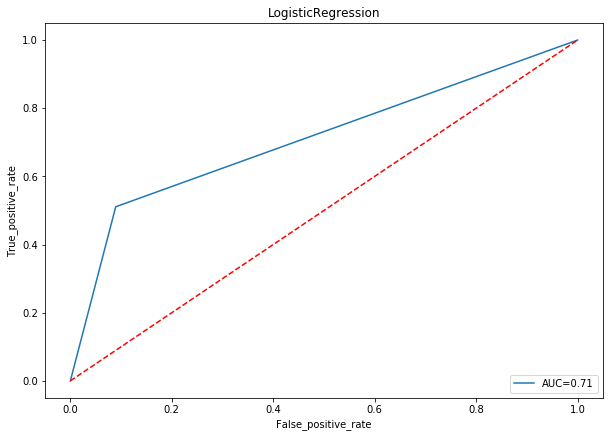

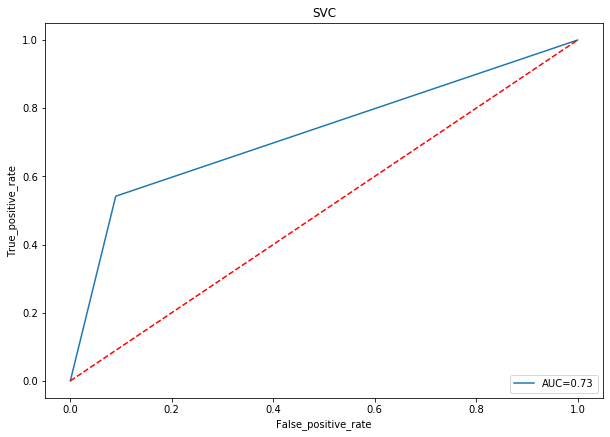

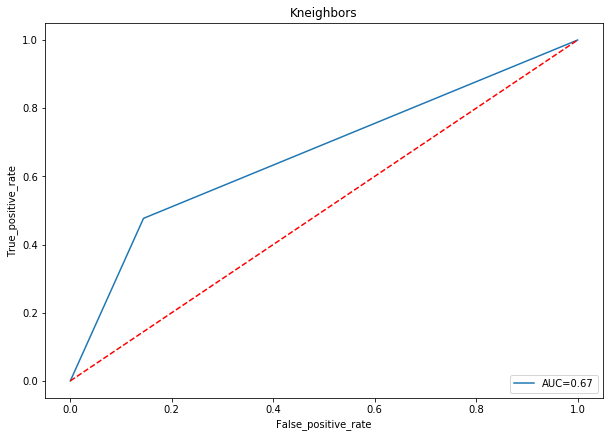

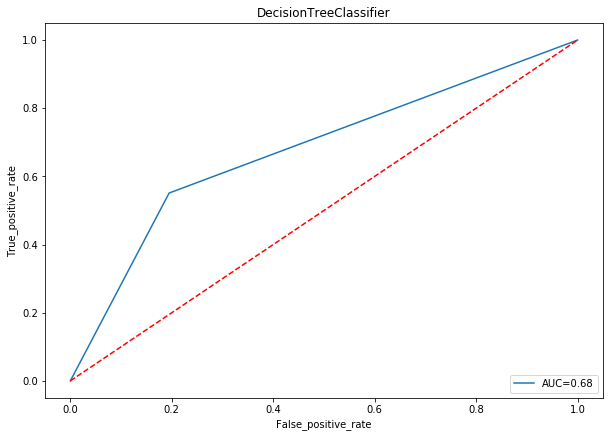

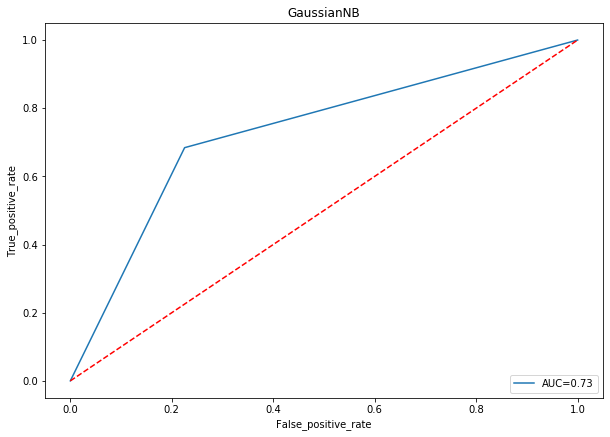

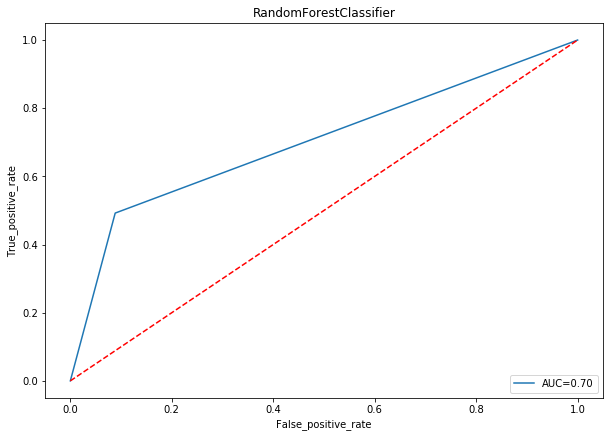

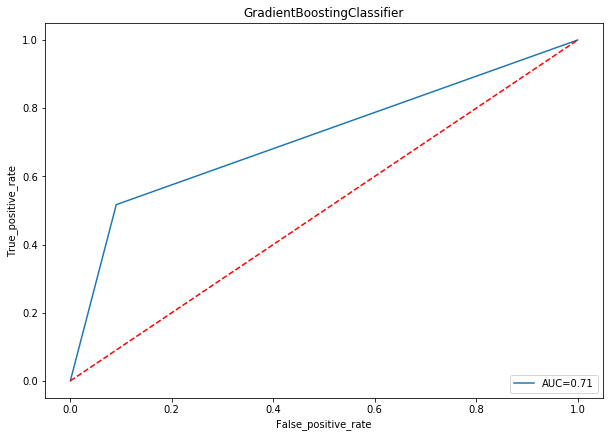

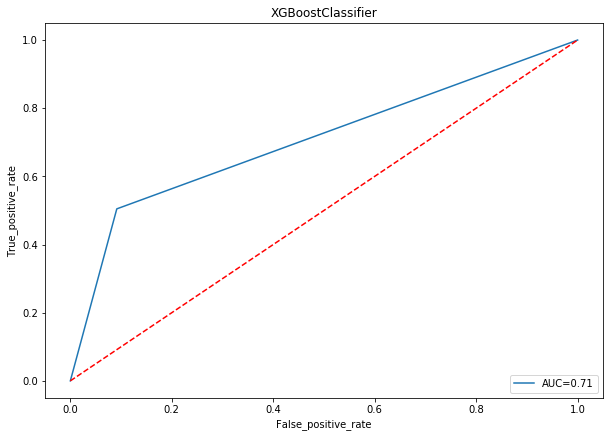

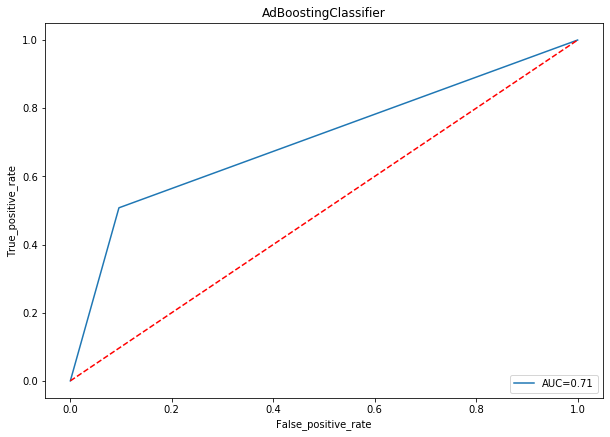

In [38]:
Model=[]
accuracy=[]
CS=[]
F1_score=[]
rocscore=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(pred,y_test)
    print('accuracy is ',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    f1=f1_score(y_test,pred)
    print('F1_score is',f1)
    F1_score.append(f1*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('confusion matrix\n',confusion_matrix(y_test,pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(511)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    print('\n\n')

In [39]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS,'F1_Score':F1_score,'Roc_score':rocscore})
best_model

,Model,Accuracy,CV_Score,F1_Score,Roc_score
0,LogisticRegression,80.911233,80.726149,57.591623,71.068111
1,SVC,81.696779,80.207033,60.034305,72.616099
2,Kneighbors,75.962294,77.016369,50.162866,66.628483
3,DecisionTreeClassifier,74.076984,73.730252,51.895044,67.817337
4,GaussianNB,75.176748,75.947211,58.311346,72.947368
5,RandomForestClassifier,80.518460,80.301793,56.183746,70.191950
6,GradientBoostingClassifier,80.989788,80.537841,57.986111,71.325077
7,XGBoostClassifier,80.597015,80.569188,56.893543,70.653251
8,AdBoostingClassifier,80.361351,80.270298,56.747405,70.597523


No handles with labels found to put in legend.


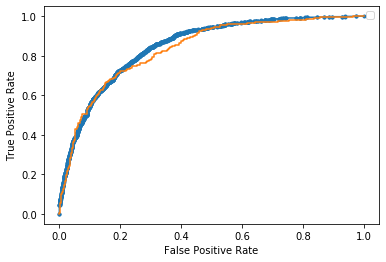

In [40]:
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr_train_probs[:,1]
lr_test_probs=lr_test_probs[:,1]
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
plt.plot(lr_train_fpr,lr_train_tpr,marker='.')
plt.plot(lr_test_fpr,lr_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No handles with labels found to put in legend.


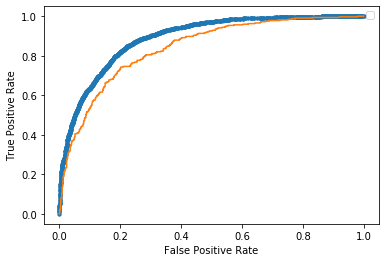

In [42]:
gb_train_probs=gb.predict_proba(x_train)
gb_test_probs=gb.predict_proba(x_test)
gb_train_probs=gb_train_probs[:,1]
gb_test_probs=gb_test_probs[:,1]
gb_train_fpr,gb_train_tpr,train_threshold=roc_curve(y_train,gb_train_probs)
gb_test_fpr,gb_test_tpr,test_threshold=roc_curve(y_test,gb_test_probs)
plt.plot(gb_train_fpr,gb_train_tpr,marker='.')
plt.plot(gb_test_fpr,gb_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [43]:
from sklearn.externals import joblib
joblib.dump(gb,'HRAttrition_joblib')

['HRAttrition_joblib']